In [1]:
!pip install gdown
!gdown 'https://drive.google.com/uc?id=1kQgD4ip7l2bPn5iMYYsX6YKU6wtxhf7Y' -O GroupProject.zip
!unzip GroupProject.zip


Downloading...
From (original): https://drive.google.com/uc?id=1kQgD4ip7l2bPn5iMYYsX6YKU6wtxhf7Y
From (redirected): https://drive.google.com/uc?id=1kQgD4ip7l2bPn5iMYYsX6YKU6wtxhf7Y&confirm=t&uuid=f21fe98c-5f21-4ae8-aa57-34c063cc7583
To: /content/GroupProject.zip
100% 142M/142M [00:01<00:00, 82.3MB/s]
Archive:  GroupProject.zip
   creating: GroupProject_IntroAI/train/images/
  inflating: GroupProject_IntroAI/train/labels/BikesHelmets147_png.rf.8fd716f5978dbd4da021a30a10170dd2.txt  
  inflating: GroupProject_IntroAI/train/labels/BikesHelmets142_png.rf.8ad908165551b9087cb6a6cab076b505.txt  
  inflating: GroupProject_IntroAI/train/labels/BikesHelmets145_png.rf.e28666e2b946293cf5031de961d90222.txt  
  inflating: GroupProject_IntroAI/train/labels/BikesHelmets129_png.rf.a316a5f7ee4ed746b64e0ab62e7680cf.txt  
  inflating: GroupProject_IntroAI/with_helmet_example_input.mp4  
  inflating: GroupProject_IntroAI/train/labels/BikesHelmets140_png.rf.1e81736c6fff6f080a0e5d92307ddf41.txt  
  inflating:

In [2]:
import os
print(os.listdir('/content/GroupProject_IntroAI'))

['helmet detection.v1i.yolov8.zip', 'best.pt', 'without_helmet_example_input.mp4', 'plate.pt', 'train', 'teestoo.png', 'data.yaml', 'with_helmet_example_input.mp4', 'plate_images']


# Installing libs

In [3]:
# Install YOLOv8 and other necessary libraries
!pip install ultralytics opencv-python-headless pytesseract yt-dlp matplotlib pandas

# Install Tesseract OCR
!apt-get update
!apt-get install -y tesseract-ocr
# verify installation
!tesseract --version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.9/171.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 19.7 MB/s eta 0:00:00


# Plate Detection Model

In [5]:
# Step 1 - Clone YOLOv5
!git clone https://github.com/ultralytics/yolov5.git /content/yolov5
%cd /content/yolov5
!pip install -r requirements.txt

# Step 2 - Imports
import torch
import cv2
from ultralytics import YOLO
import pandas as pd
from google.colab.patches import cv2_imshow


Cloning into '/content/yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.11 MiB | 24.99 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.
/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
<ipython-input-6-6fae67733672>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plates_df = pd.concat([plates_df, pd.DataFrame([{


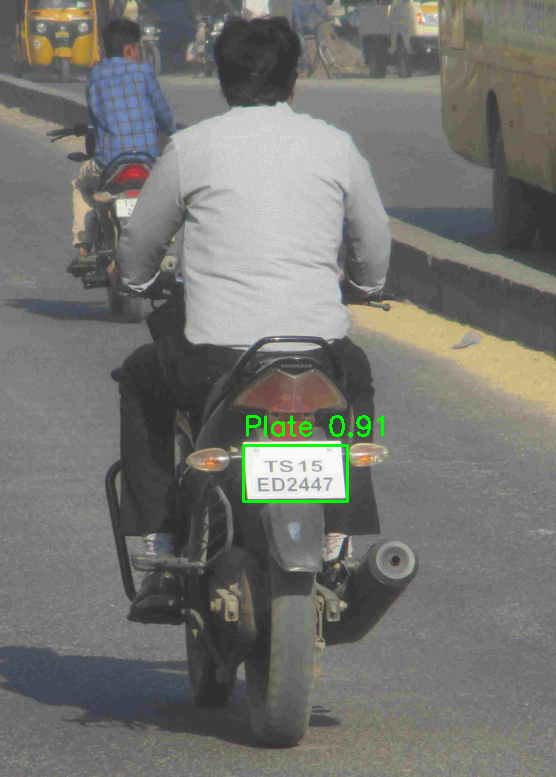

  Class  Confidence          X1          Y1        X2          Y2
0     0    0.908357  243.935013  445.995941  347.3172  501.148285


In [6]:
# Step 3 - Load model from local clone
plate_model = torch.hub.load('/content/yolov5', 'custom', path='/content/GroupProject_IntroAI/plate.pt', source='local')

# Step 4 - Load image
image_path = '/content/GroupProject_IntroAI/teestoo.png'
frame = cv2.imread(image_path)

if frame is None:
    raise ValueError(f"❌ OpenCV failed to load the image: {image_path}")

# Step 5 - Run inference
results = plate_model(frame)

# Step 6 - Prepare results DataFrame
plates_df = pd.DataFrame(columns=['Class', 'Confidence', 'X1', 'Y1', 'X2', 'Y2'])

for det in results.xyxy[0]:
    x1, y1, x2, y2, conf, class_id = det.tolist()
    plates_df = pd.concat([plates_df, pd.DataFrame([{
        'Class': int(class_id),
        'Confidence': conf,
        'X1': x1,
        'Y1': y1,
        'X2': x2,
        'Y2': y2
    }])], ignore_index=True)

    # Draw box on image
    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(frame, f'Plate {conf:.2f}', (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Step 7 - Show image with detections
cv2_imshow(frame)

# Optional - Save result if needed
cv2.imwrite('/content/plate_detection_result.jpg', frame)

# Step 8 - Print DataFrame of detections
print(plates_df)


# Helmet Detection Model


0: 640x480 1 Without Helmet, 5391.5ms
Speed: 9.7ms preprocess, 5391.5ms inference, 11.4ms postprocess per image at shape (1, 3, 640, 480)


<ipython-input-8-65aa5263260c>:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  detections_df = pd.concat([detections_df, new_row], ignore_index=True)


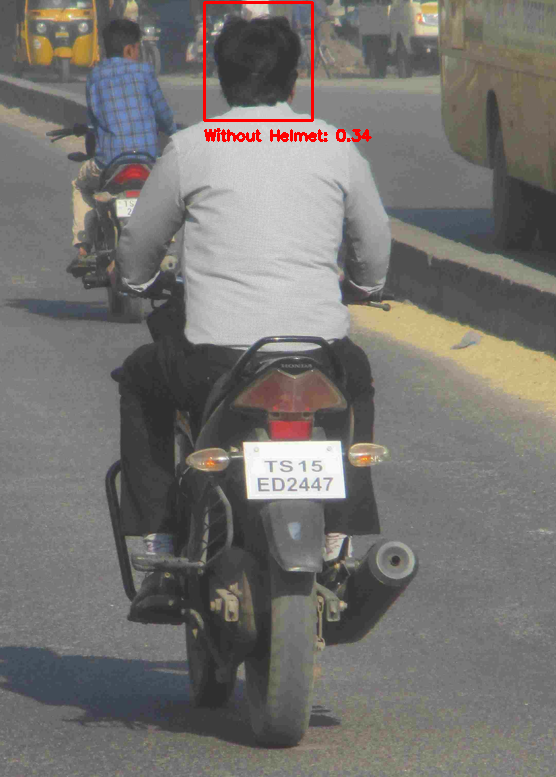

  Frame           Class  Confidence
0     1  Without Helmet    0.344851


In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Load the custom-trained YOLOv8 model
model = YOLO('/content/GroupProject_IntroAI/best.pt')  # Using your custom model with two classes: helmet, no_helmet

# Define class names according to your custom model
class_names = ['With Helmet', 'Without Helmet']

# Initialize DataFrame to store detections
detections_df = pd.DataFrame(columns=['Frame', 'Class', 'Confidence'])

# Load the image
image_path = '/content/GroupProject_IntroAI/teestoo.png'  # Update this with your image path
frame = cv2.imread(image_path)

# Get image dimensions
frame_height, frame_width, _ = frame.shape

# Initialize frame count (since it's just one image)
frame_count = 1

# Run YOLOv8 detection
results = model(frame)

# Loop through detections
for result in results[0].boxes.data:
    x1, y1, x2, y2, score, class_id = result.cpu().numpy()
    class_id = int(class_id)
    confidence = float(score)

    # Draw bounding box and label with confidence score
    color = (0, 255, 0) if class_id == 0 else (0, 0, 255)  # Green for With Helmet, Red for Without Helmet
    label = f"{class_names[class_id]}: {confidence:.2f}"
    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)

    # Move the label below the bounding box
    label_position = (int(x1), int(y2) + 20)  # Adjust this to position the label below the box
    cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Store detection information in DataFrame
    new_row = pd.DataFrame([{
        'Frame': frame_count,
        'Class': class_names[class_id],
        'Confidence': confidence
    }])
    detections_df = pd.concat([detections_df, new_row], ignore_index=True)

# Save or display the resulting image
cv2.imwrite('output_image.jpg', frame)

# Optionally display the image using cv2_imshow (if using Colab or Jupyter)
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Optionally display the DataFrame containing detections
print(detections_df)


# **Integrated Model**
### Detect plate if the driver is not wearing a helmet, and detect the license number by using EasyOCR library.

## For Images

fatal: destination path '/content/yolov5' already exists and is not an empty directory.
/content/yolov5


YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
0: 640x480 1 Without Helmet, 3026.0ms
Speed: 6.2ms preprocess, 3026.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


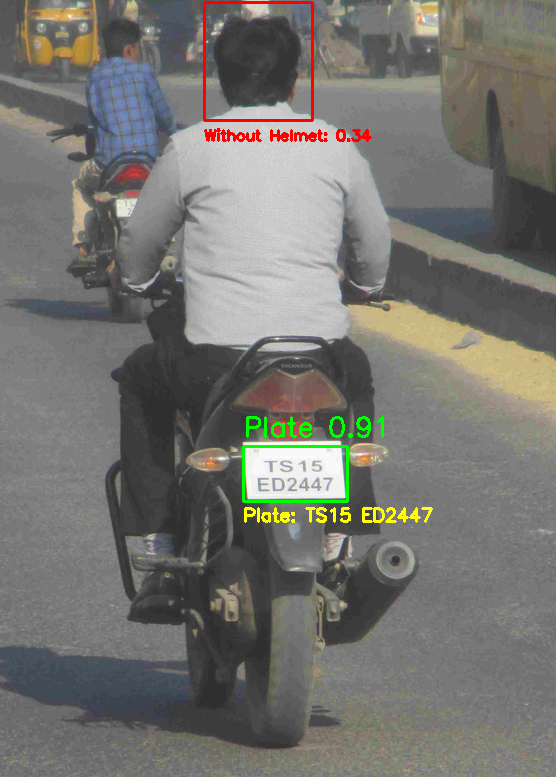

  Plate Number                                     Image Filename
0  TS15 ED2447  /content/GroupProject_IntroAI/plate_images/pla...


In [ ]:
# Step 1 - Clone YOLOv5 if not already done
!git clone https://github.com/ultralytics/yolov5.git /content/yolov5
%cd /content/yolov5
!pip install -r requirements.txt

# Step 2 - Imports
import torch
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow
import easyocr  # Import EasyOCR
from datetime import datetime
import os

# Step 3 - Load model from local clone
plate_model = torch.hub.load('/content/yolov5', 'custom', path='/content/GroupProject_IntroAI/plate.pt', source='local')

# Step 4 - Initialize EasyOCR reader
reader = easyocr.Reader(['en'])  # Using English language for OCR

# Step 5 - Load image
image_path = '/content/GroupProject_IntroAI/teestoo.png'
frame = cv2.imread(image_path)

if frame is None:
    raise ValueError(f"❌ OpenCV failed to load the image: {image_path}")

# Step 6 - Run helmet detection using the loaded `model` for helmet detection
helmet_results = model(frame)

# Step 7 - Initialize DataFrame to store detections for plates
plates_df = pd.DataFrame(columns=['Plate Number', 'Image Filename'])

# Step 8 - Create a directory to store images and CSV file
output_dir = "/content/GroupProject_IntroAI/plate_images"
os.makedirs(output_dir, exist_ok=True)

# Loop through the helmet detection results
for result in helmet_results[0].boxes.data:
    x1, y1, x2, y2, score, class_id = result.cpu().numpy()
    class_id = int(class_id)
    confidence = float(score)

    # Draw bounding box and label with confidence score
    color = (0, 255, 0) if class_id == 0 else (0, 0, 255)  # Green for With Helmet, Red for Without Helmet
    label = f"{class_names[class_id]}: {confidence:.2f}"
    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)

    # Move the label below the bounding box
    label_position = (int(x1), int(y2) + 20)  # Adjust this to position the label below the box
    cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


    # If person is without a helmet, attempt license plate detection using plate_model
    if class_names[class_id] == 'Without Helmet':
        # Step 9 - Run plate detection on the full image using plate_model
        results = plate_model(frame)

        # Step 10 - Prepare results DataFrame for license plates
        for det in results.xyxy[0]:
            x1_plate, y1_plate, x2_plate, y2_plate, conf, class_id_plate = det.tolist()

            # Draw box around the detected plate
            cv2.rectangle(frame, (int(x1_plate), int(y1_plate)), (int(x2_plate), int(y2_plate)), (0, 255, 0), 2)
            cv2.putText(frame, f'Plate {conf:.2f}', (int(x1_plate), int(y1_plate) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # OCR: Apply EasyOCR to extract text from the license plate region
            plate_roi = frame[int(y1_plate):int(y2_plate), int(x1_plate):int(x2_plate)]
            plate_text = reader.readtext(plate_roi)
            if plate_text:
                # Extract and display all lines of text from the detected plate
                text_lines = [line[1] for line in plate_text]  # Extract all detected text lines
                full_text = " ".join(text_lines)  # Combine lines if needed

                # Save the plate number and image file
                plate_filename = f"{output_dir}/plate_{datetime.now().strftime('%Y%m%d%H%M%S')}.jpg"
                cv2.imwrite(plate_filename, plate_roi)  # Save the cropped plate image

                # Append the plate number and image path to the DataFrame
                plates_df = pd.concat([plates_df, pd.DataFrame([{
                    'Plate Number': full_text,
                    'Image Filename': plate_filename
                }])], ignore_index=True)

                # Display the full text of the plate, below the plate box
                text_position = (int(x1_plate), int(y2_plate) + 20)  # Below the plate box
                cv2.putText(frame, f'Plate: {full_text}', text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

# Step 11 - Show image with plate detections and OCR text
cv2_imshow(frame)

# Optional - Save result if needed
cv2.imwrite('/content/plate_detection_result_with_ocr.jpg', frame)

# Step 12 - Save DataFrame to CSV for plate numbers and corresponding image filenames
plates_df.to_csv('/content/plate_numbers.csv', index=False)

# Step 13 - Print DataFrame of plate detections
print(plates_df)


In [ ]:
plates_df

,Plate Number,Image Filename
0,TS15 ED2447,/content/GroupProject_IntroAI/plate_images/pla...


## For Videos

### With Helmet Example

In [ ]:
import os
import cv2
import pandas as pd
import easyocr
from datetime import datetime

# Step 2 - Load video
video_path = '/content/with_helmet_example_input.mp4'  # Path to your video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise ValueError(f"❌ Could not open video file: {video_path}")

# Step 3 - Initialize a directory to store images and CSV file
output_dir = "/content/plate_images"
os.makedirs(output_dir, exist_ok=True)

# Initialize DataFrame to store plate information
plates_df = pd.DataFrame(columns=['Plate Number', 'Image Filename'])

# Step 4 - Initialize VideoWriter to save processed video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('/content/processed_video.avi', fourcc, 30.0, (frame_width, frame_height))

# Step 5 - Process each frame of the video
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break  # End of video

    frame_count += 1
    print(f"Processing frame {frame_count}")

    # Run helmet detection using the loaded `model` for helmet detection
    helmet_results = model(frame)

    # Loop through the helmet detection results
    for result in helmet_results[0].boxes.data:
        x1, y1, x2, y2, score, class_id = result.cpu().numpy()
        class_id = int(class_id)
        confidence = float(score)

        # Draw bounding box and label with confidence score
        color = (0, 255, 0) if class_id == 0 else (0, 0, 255)  # Green for With Helmet, Red for Without Helmet
        label = f"{class_names[class_id]}: {confidence:.2f}"
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # If person is without a helmet, attempt license plate detection using plate_model
        if class_names[class_id] == 'Without Helmet':
            # Run plate detection on the full image using plate_model
            results = plate_model(frame)

            # Prepare results DataFrame for license plates
            for det in results.xyxy[0]:
                x1_plate, y1_plate, x2_plate, y2_plate, conf, class_id_plate = det.tolist()

                # Draw box around the detected plate
                cv2.rectangle(frame, (int(x1_plate), int(y1_plate)), (int(x2_plate), int(y2_plate)), (0, 255, 0), 2)
                cv2.putText(frame, f'Plate {conf:.2f}', (int(x1_plate), int(y1_plate) - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                # OCR: Apply EasyOCR to extract text from the license plate region
                plate_roi = frame[int(y1_plate):int(y2_plate), int(x1_plate):int(x2_plate)]
                plate_text = reader.readtext(plate_roi)
                if plate_text:
                    # Extract and display all lines of text from the detected plate
                    text_lines = [line[1] for line in plate_text]  # Extract all detected text lines
                    full_text = " ".join(text_lines)  # Combine lines if needed

                    # Save the plate number and image file
                    plate_filename = f"{output_dir}/plate_{datetime.now().strftime('%Y%m%d%H%M%S')}.jpg"
                    cv2.imwrite(plate_filename, plate_roi)  # Save the cropped plate image

                    # Append the plate number and image path to the DataFrame
                    plates_df = pd.concat([plates_df, pd.DataFrame([{
                        'Plate Number': full_text,
                        'Image Filename': plate_filename
                    }])], ignore_index=True)

                    # Display the full text of the plate, below the plate box
                    text_position = (int(x1_plate), int(y2_plate) + 20)  # Below the plate box
                    cv2.putText(frame, f'Plate: {full_text}', text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

    # Write the processed frame to the output video
    output_video.write(frame)

# Step 6 - Release video resources
cap.release()
output_video.release()

# Step 7 - Save DataFrame to CSV for plate numbers and corresponding image filenames
plates_df.to_csv('/content/plate_numbers.csv', index=False)

# Step 8 - Display the DataFrame with plate details
print(plates_df)


Processing frame 1

0: 640x384 (no detections), 40.1ms
Speed: 4.0ms preprocess, 40.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 2

0: 640x384 (no detections), 39.9ms
Speed: 3.5ms preprocess, 39.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 3

0: 640x384 (no detections), 39.9ms
Speed: 3.2ms preprocess, 39.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 4

0: 640x384 (no detections), 31.6ms
Speed: 3.2ms preprocess, 31.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 5

0: 640x384 (no detections), 26.6ms
Speed: 3.2ms preprocess, 26.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 6

0: 640x384 (no detections), 26.2ms
Speed: 2.9ms preprocess, 26.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 7

0: 640x384 (no detections), 25.8ms
Speed: 3.4ms preprocess, 25.8ms i

/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 31

0: 640x384 1 Without Helmet, 19.2ms
Speed: 2.8ms preprocess, 19.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 32

0: 640x384 1 Without Helmet, 21.0ms
Speed: 3.4ms preprocess, 21.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 33

0: 640x384 1 Without Helmet, 19.4ms
Speed: 5.0ms preprocess, 19.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 34

0: 640x384 (no detections), 19.2ms
Speed: 3.1ms preprocess, 19.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 35

0: 640x384 (no detections), 22.7ms
Speed: 3.1ms preprocess, 22.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 36



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 (no detections), 21.6ms
Speed: 4.0ms preprocess, 21.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 37

0: 640x384 1 Without Helmet, 20.4ms
Speed: 3.3ms preprocess, 20.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 38

0: 640x384 1 Without Helmet, 19.7ms
Speed: 2.8ms preprocess, 19.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 39

0: 640x384 1 Without Helmet, 20.8ms
Speed: 3.3ms preprocess, 20.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 40

0: 640x384 1 Without Helmet, 26.9ms
Speed: 3.2ms preprocess, 26.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 41



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 18.8ms
Speed: 3.2ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 42

0: 640x384 1 Without Helmet, 20.7ms
Speed: 3.1ms preprocess, 20.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 43

0: 640x384 1 Without Helmet, 21.2ms
Speed: 2.9ms preprocess, 21.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 44

0: 640x384 1 Without Helmet, 19.3ms
Speed: 3.3ms preprocess, 19.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 45



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 28.6ms
Speed: 5.1ms preprocess, 28.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 46

0: 640x384 1 Without Helmet, 19.2ms
Speed: 2.8ms preprocess, 19.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 47

0: 640x384 1 Without Helmet, 19.9ms
Speed: 3.3ms preprocess, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 48

0: 640x384 1 Without Helmet, 19.5ms
Speed: 3.0ms preprocess, 19.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 49

0: 640x384 1 Without Helmet, 21.0ms
Speed: 3.2ms preprocess, 21.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 50

0: 640x384 1 Without Helmet, 19.1ms
Speed: 3.8ms preprocess, 19.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 51

0: 640x384 1 Without Helmet, 20.9ms
Speed: 3.4ms preprocess, 20.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 52

0: 640x384 1 Without Helmet, 19.2ms
Speed: 3.3ms preprocess, 19.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 53

0: 640x384 1 Without Helmet, 20.9ms
Speed: 3.4ms preprocess, 20.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 54

0: 640x384 1 Without Helmet, 19.0ms
Speed: 3.7ms preprocess, 19.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 55

0: 640x384 1 Without Helmet, 20.8ms
Speed: 3.3ms preprocess, 20.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 56

0: 640x384 1 Without Helmet, 19.0ms
Speed: 3.3ms preprocess, 19.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 57

0: 640x384 1 Without Helmet, 21.1ms
Speed: 3.3ms preprocess, 21.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 58

0: 640x384 1 Without Helmet, 19.2ms
Speed: 3.6ms preprocess, 19.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 59

0: 640x384 1 With Helmet, 21.0ms
Speed: 3.4ms preprocess, 21.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 60

0: 640x384 1 With Helmet, 22.3ms
Speed: 3.3ms preprocess, 22.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 61

0: 640x384 1 With Helmet, 1 Without Helmet, 21.1ms
Speed: 3.5ms preprocess, 21.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 62

0: 640x384 1 With Helmet, 19.1ms
Speed: 6.8ms preprocess, 19.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 63

0: 640x384 1 With Helmet, 19.5ms
Speed: 3.3ms preprocess, 19.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 64

0: 640x384 1 With Helmet, 19.8ms
Speed: 3.1ms preprocess, 19.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 65

0: 640x384 1 With Helmet, 19.5ms
Speed: 3.5ms preproces

/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 With Helmet, 22.7ms
Speed: 3.4ms preprocess, 22.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 67

0: 640x384 1 With Helmet, 24.0ms
Speed: 3.1ms preprocess, 24.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 68

0: 640x384 1 Without Helmet, 20.3ms
Speed: 6.3ms preprocess, 20.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 69

0: 640x384 1 Without Helmet, 21.5ms
Speed: 3.1ms preprocess, 21.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 70

0: 640x384 1 Without Helmet, 19.1ms
Speed: 2.8ms preprocess, 19.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 71

0: 640x384 1 Without Helmet, 21.0ms
Speed: 3.5ms preprocess, 21.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 72

0: 640x384 1 Without Helmet, 19.2ms


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Speed: 3.1ms preprocess, 19.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 73

0: 640x384 1 Without Helmet, 20.4ms
Speed: 3.1ms preprocess, 20.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 74

0: 640x384 1 Without Helmet, 20.2ms
Speed: 3.3ms preprocess, 20.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 75

0: 640x384 1 Without Helmet, 19.2ms
Speed: 3.5ms preprocess, 19.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 76



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 21.4ms
Speed: 3.2ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 77

0: 640x384 1 Without Helmet, 19.9ms
Speed: 3.3ms preprocess, 19.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 78

0: 640x384 1 Without Helmet, 20.0ms
Speed: 3.1ms preprocess, 20.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 79

0: 640x384 1 With Helmet, 1 Without Helmet, 20.1ms
Speed: 4.0ms preprocess, 20.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 80



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 (no detections), 25.3ms
Speed: 3.0ms preprocess, 25.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 81

0: 640x384 1 With Helmet, 20.1ms
Speed: 3.5ms preprocess, 20.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 82

0: 640x384 1 Without Helmet, 20.4ms
Speed: 4.5ms preprocess, 20.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 83

0: 640x384 1 Without Helmet, 20.4ms
Speed: 2.8ms preprocess, 20.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 84

0: 640x384 1 Without Helmet, 20.2ms
Speed: 3.3ms preprocess, 20.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 85

0: 640x384 1 Without Helmet, 19.1ms
Speed: 4.7ms preprocess, 19.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 86

0: 640x384 1 Without Helmet, 20.9ms
Speed: 3.4ms preprocess, 20.9ms inference, 2

/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 87

0: 640x384 1 Without Helmet, 19.4ms
Speed: 3.1ms preprocess, 19.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 88

0: 640x384 1 Without Helmet, 20.4ms
Speed: 3.6ms preprocess, 20.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 89

0: 640x384 1 Without Helmet, 19.5ms
Speed: 3.2ms preprocess, 19.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 90

0: 640x384 1 Without Helmet, 20.0ms
Speed: 2.8ms preprocess, 20.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 91

0: 640x384 1 Without Helmet, 21.0ms
Speed: 2.9ms preprocess, 21.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 92



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 21.2ms
Speed: 3.0ms preprocess, 21.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 93

0: 640x384 1 Without Helmet, 22.6ms
Speed: 2.4ms preprocess, 22.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 94

0: 640x384 1 Without Helmet, 22.6ms
Speed: 2.5ms preprocess, 22.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 95

0: 640x384 1 Without Helmet, 19.7ms
Speed: 3.0ms preprocess, 19.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 96

0: 640x384 1 Without Helmet, 20.2ms
Speed: 2.6ms preprocess, 20.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 97



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 21.5ms
Speed: 3.0ms preprocess, 21.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 98

0: 640x384 1 Without Helmet, 21.6ms
Speed: 2.6ms preprocess, 21.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 99

0: 640x384 1 Without Helmet, 20.7ms
Speed: 2.6ms preprocess, 20.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 100

0: 640x384 1 Without Helmet, 19.9ms
Speed: 2.6ms preprocess, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 101

0: 640x384 1 Without Helmet, 20.2ms
Speed: 2.7ms preprocess, 20.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 102



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 21.2ms
Speed: 3.0ms preprocess, 21.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 103

0: 640x384 1 Without Helmet, 21.6ms
Speed: 4.0ms preprocess, 21.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 104

0: 640x384 1 Without Helmet, 20.5ms
Speed: 2.8ms preprocess, 20.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 105

0: 640x384 1 Without Helmet, 19.0ms
Speed: 3.0ms preprocess, 19.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 106

0: 640x384 1 Without Helmet, 21.5ms
Speed: 2.9ms preprocess, 21.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 107

0: 640x384 1 Without Helmet, 20.7ms
Speed: 2.8ms preprocess, 20.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 108

0: 640x384 1 Without Helmet, 19.3ms
Speed: 3.8ms preprocess, 19.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 109

0: 640x384 1 Without Helmet, 21.0ms
Speed: 3.4ms preprocess, 21.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 110

0: 640x384 1 Without Helmet, 19.2ms
Speed: 4.3ms preprocess, 19.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 111

0: 640x384 1 Without Helmet, 21.5ms
Speed: 3.8ms preprocess, 21.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 112

0: 640x384 1 Without Helmet, 20.4ms
Speed: 2.7ms preprocess, 20.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 113

0: 640x384 1 Without Helmet, 19.9ms
Speed: 3.0ms preprocess, 19.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 114

0: 640x384 1 Without Helmet, 20.1ms
Speed: 2.3ms preprocess, 20.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 115

0: 640x384 1 Without Helmet, 20.8ms
Speed: 3.7ms preprocess, 20.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 116

0: 640x384 1 With Helmet, 1 Without Helmet, 21.5ms
Speed: 3.2ms preprocess, 21.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 117



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 With Helmet, 1 Without Helmet, 21.6ms
Speed: 2.7ms preprocess, 21.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 118

0: 640x384 1 Without Helmet, 20.6ms
Speed: 2.6ms preprocess, 20.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 119

0: 640x384 1 Without Helmet, 19.6ms
Speed: 3.0ms preprocess, 19.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 120

0: 640x384 1 Without Helmet, 20.3ms
Speed: 2.7ms preprocess, 20.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 121

0: 640x384 1 Without Helmet, 21.0ms
Speed: 3.1ms preprocess, 21.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 122



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 21.7ms
Speed: 3.3ms preprocess, 21.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 123

0: 640x384 1 Without Helmet, 20.8ms
Speed: 3.0ms preprocess, 20.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 124

0: 640x384 1 Without Helmet, 19.5ms
Speed: 3.2ms preprocess, 19.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 125

0: 640x384 1 Without Helmet, 20.2ms
Speed: 3.4ms preprocess, 20.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 126

0: 640x384 1 Without Helmet, 21.9ms
Speed: 2.4ms preprocess, 21.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 127



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 19.8ms
Speed: 5.9ms preprocess, 19.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 128

0: 640x384 1 Without Helmet, 20.7ms
Speed: 3.1ms preprocess, 20.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 129

0: 640x384 1 Without Helmet, 19.7ms
Speed: 5.5ms preprocess, 19.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 130

0: 640x384 1 Without Helmet, 20.6ms
Speed: 4.0ms preprocess, 20.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 131

0: 640x384 1 Without Helmet, 19.7ms
Speed: 3.0ms preprocess, 19.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 132

0: 640x384 1 Without Helmet, 19.8ms
Speed: 3.1ms preprocess, 19.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 133

0: 640x384 1 Without Helmet, 21.2ms
Speed: 3.0ms preprocess, 21.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 134

0: 640x384 1 Without Helmet, 21.5ms
Speed: 2.7ms preprocess, 21.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 135

0: 640x384 1 Without Helmet, 20.5ms
Speed: 3.0ms preprocess, 20.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 136

0: 640x384 1 Without Helmet, 19.6ms
Speed: 2.9ms preprocess, 19.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 137



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 20.2ms
Speed: 2.6ms preprocess, 20.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 138

0: 640x384 1 Without Helmet, 21.6ms
Speed: 3.0ms preprocess, 21.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 139

0: 640x384 1 Without Helmet, 20.7ms
Speed: 2.8ms preprocess, 20.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 140

0: 640x384 1 Without Helmet, 19.5ms
Speed: 3.1ms preprocess, 19.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 141

0: 640x384 1 Without Helmet, 20.7ms
Speed: 2.4ms preprocess, 20.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 142



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 21.7ms
Speed: 2.8ms preprocess, 21.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 143

0: 640x384 1 With Helmet, 21.5ms
Speed: 2.7ms preprocess, 21.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 144

0: 640x384 1 With Helmet, 20.8ms
Speed: 3.3ms preprocess, 20.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 145

0: 640x384 1 With Helmet, 1 Without Helmet, 20.7ms
Speed: 5.8ms preprocess, 20.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 146

0: 640x384 1 Without Helmet, 19.9ms
Speed: 3.3ms preprocess, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 147



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 20.0ms
Speed: 3.2ms preprocess, 20.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 148

0: 640x384 1 Without Helmet, 21.5ms
Speed: 3.6ms preprocess, 21.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 149

0: 640x384 1 Without Helmet, 20.9ms
Speed: 3.4ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 150

0: 640x384 1 Without Helmet, 19.5ms
Speed: 3.1ms preprocess, 19.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 151

0: 640x384 1 Without Helmet, 20.0ms
Speed: 3.0ms preprocess, 20.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 152

0: 640x384 1 Without Helmet, 19.5ms
Speed: 5.8ms preprocess, 19.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 153

0: 640x384 1 Without Helmet, 18.9ms
Speed: 3.2ms preprocess, 18.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 154

0: 640x384 1 Without Helmet, 21.2ms
Speed: 3.0ms preprocess, 21.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 155

0: 640x384 1 With Helmet, 1 Without Helmet, 20.5ms
Speed: 4.0ms preprocess, 20.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 156

0: 640x384 1 Without Helmet, 20.0ms
Speed: 2.9ms preprocess, 20.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 157



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 21.8ms
Speed: 2.8ms preprocess, 21.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 158

0: 640x384 1 Without Helmet, 22.0ms
Speed: 2.7ms preprocess, 22.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 159

0: 640x384 1 Without Helmet, 19.7ms
Speed: 3.4ms preprocess, 19.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 160

0: 640x384 1 Without Helmet, 18.8ms
Speed: 3.6ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 161

0: 640x384 1 Without Helmet, 19.4ms
Speed: 3.2ms preprocess, 19.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 162

0: 640x384 1 Without Helmet, 19.5ms
Speed: 3.1ms preprocess, 19.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 163

0: 640x384 1 Without Helmet, 19.0ms
Speed: 3.3ms preprocess, 19.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 164



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 19.5ms
Speed: 3.5ms preprocess, 19.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 165

0: 640x384 1 Without Helmet, 19.2ms
Speed: 3.3ms preprocess, 19.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 166

0: 640x384 1 With Helmet, 1 Without Helmet, 19.0ms
Speed: 3.4ms preprocess, 19.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 167

0: 640x384 1 With Helmet, 18.7ms
Speed: 3.1ms preprocess, 18.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 168

0: 640x384 1 With Helmet, 19.5ms
Speed: 3.1ms preprocess, 19.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 169

0: 640x384 1 With Helmet, 21.6ms
Speed: 2.9ms preprocess, 21.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 170

0: 640x384 1 With Helmet, 22.6ms
Speed: 3.1ms preprocess, 22.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 171

0: 640x384 1 With Helmet, 23.1ms
Speed: 3.5ms preprocess, 23.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 172

0: 640x384 1 With Helmet, 21.8ms
Speed: 2.9ms preprocess, 21.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 173

0: 640x384 1 With Helmet, 1 Without Helmet, 21.3ms
Speed: 3.0ms pr

/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 178

0: 640x384 1 Without Helmet, 19.0ms
Speed: 3.0ms preprocess, 19.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 179

0: 640x384 1 With Helmet, 1 Without Helmet, 19.5ms
Speed: 3.8ms preprocess, 19.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 180

0: 640x384 1 With Helmet, 18.5ms
Speed: 3.5ms preprocess, 18.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 181



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 With Helmet, 20.9ms
Speed: 2.7ms preprocess, 20.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 182

0: 640x384 1 With Helmet, 21.0ms
Speed: 3.3ms preprocess, 21.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 183

0: 640x384 1 With Helmet, 20.4ms
Speed: 3.1ms preprocess, 20.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 184

0: 640x384 1 Without Helmet, 21.3ms
Speed: 3.1ms preprocess, 21.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 185

0: 640x384 1 With Helmet, 19.0ms
Speed: 3.5ms preprocess, 19.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 186

0: 640x384 1 With Helmet, 20.3ms
Speed: 2.9ms preprocess, 20.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 187

0: 640x384 (no detections), 23.8ms
Speed: 3.5ms preprocess, 23.8ms inference, 1.7ms p

/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 With Helmet, 20.2ms
Speed: 3.4ms preprocess, 20.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 190

0: 640x384 1 With Helmet, 21.3ms
Speed: 3.0ms preprocess, 21.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 191

0: 640x384 1 With Helmet, 21.6ms
Speed: 2.9ms preprocess, 21.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 192

0: 640x384 1 With Helmet, 22.8ms
Speed: 3.7ms preprocess, 22.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 193

0: 640x384 1 With Helmet, 22.7ms
Speed: 3.1ms preprocess, 22.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 194

0: 640x384 1 With Helmet, 21.5ms
Speed: 3.3ms preprocess, 21.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 195

0: 640x384 (no detections), 20.8ms
Speed: 3.2ms preprocess, 20.8ms inference, 0.6ms post

/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 199

0: 640x384 (no detections), 20.0ms
Speed: 3.2ms preprocess, 20.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 200

0: 640x384 1 Without Helmet, 20.1ms
Speed: 3.4ms preprocess, 20.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 201

0: 640x384 1 Without Helmet, 19.8ms
Speed: 3.2ms preprocess, 19.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 202

0: 640x384 1 Without Helmet, 18.8ms
Speed: 3.2ms preprocess, 18.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 203



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 19.4ms
Speed: 3.3ms preprocess, 19.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 204

0: 640x384 1 Without Helmet, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 205

0: 640x384 1 Without Helmet, 18.7ms
Speed: 3.5ms preprocess, 18.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 206

0: 640x384 1 Without Helmet, 19.4ms
Speed: 3.1ms preprocess, 19.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 207

0: 640x384 1 Without Helmet, 19.8ms
Speed: 3.0ms preprocess, 19.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 208



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 18.7ms
Speed: 2.9ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 209

0: 640x384 1 Without Helmet, 19.9ms
Speed: 3.9ms preprocess, 19.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 210

0: 640x384 1 Without Helmet, 18.6ms
Speed: 3.3ms preprocess, 18.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 211

0: 640x384 1 Without Helmet, 19.1ms
Speed: 3.3ms preprocess, 19.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 212

0: 640x384 1 Without Helmet, 19.1ms
Speed: 3.5ms preprocess, 19.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 213

0: 640x384 1 Without Helmet, 18.8ms
Speed: 3.5ms preprocess, 18.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 214



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 19.5ms
Speed: 3.3ms preprocess, 19.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 215

0: 640x384 1 Without Helmet, 18.7ms
Speed: 3.6ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 216

0: 640x384 1 Without Helmet, 19.4ms
Speed: 4.7ms preprocess, 19.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 217

0: 640x384 1 Without Helmet, 18.4ms
Speed: 3.6ms preprocess, 18.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 218

0: 640x384 1 Without Helmet, 19.2ms
Speed: 3.0ms preprocess, 19.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 219

0: 640x384 1 Without Helmet, 18.6ms
Speed: 3.3ms preprocess, 18.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 220



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 19.4ms
Speed: 3.3ms preprocess, 19.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 221

0: 640x384 1 Without Helmet, 18.8ms
Speed: 2.5ms preprocess, 18.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 222

0: 640x384 1 Without Helmet, 19.6ms
Speed: 3.9ms preprocess, 19.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 223



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 18.9ms
Speed: 3.7ms preprocess, 18.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 224

0: 640x384 1 Without Helmet, 19.7ms
Speed: 2.9ms preprocess, 19.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 225

0: 640x384 1 Without Helmet, 19.0ms
Speed: 3.7ms preprocess, 19.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 226



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 19.5ms
Speed: 3.1ms preprocess, 19.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 227

0: 640x384 1 Without Helmet, 18.8ms
Speed: 3.1ms preprocess, 18.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 228



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 19.5ms
Speed: 2.8ms preprocess, 19.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 229

0: 640x384 1 Without Helmet, 19.2ms
Speed: 3.6ms preprocess, 19.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 230

0: 640x384 1 Without Helmet, 19.5ms
Speed: 3.4ms preprocess, 19.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 231

0: 640x384 1 With Helmet, 1 Without Helmet, 19.5ms
Speed: 4.5ms preprocess, 19.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 232

0: 640x384 1 Without Helmet, 19.3ms
Speed: 3.5ms preprocess, 19.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 233



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 19.4ms
Speed: 2.8ms preprocess, 19.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 234

0: 640x384 1 Without Helmet, 19.9ms
Speed: 3.1ms preprocess, 19.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 235

0: 640x384 1 Without Helmet, 19.6ms
Speed: 2.9ms preprocess, 19.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 236

0: 640x384 1 Without Helmet, 19.9ms
Speed: 3.5ms preprocess, 19.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 237

0: 640x384 1 Without Helmet, 19.6ms
Speed: 3.6ms preprocess, 19.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 238

0: 640x384 1 Without Helmet, 18.9ms
Speed: 3.7ms preprocess, 18.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 239

0: 640x384 1 Without Helmet, 18.8ms
Speed: 3.4ms preprocess, 18.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 240



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 19.1ms
Speed: 3.4ms preprocess, 19.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 241

0: 640x384 1 Without Helmet, 19.0ms
Speed: 3.7ms preprocess, 19.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 242

0: 640x384 1 Without Helmet, 18.7ms
Speed: 3.7ms preprocess, 18.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 243

0: 640x384 1 Without Helmet, 19.4ms
Speed: 4.1ms preprocess, 19.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 244

0: 640x384 1 Without Helmet, 19.6ms
Speed: 3.2ms preprocess, 19.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 245



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 19.1ms
Speed: 3.2ms preprocess, 19.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 246

0: 640x384 1 Without Helmet, 19.2ms
Speed: 3.1ms preprocess, 19.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 247

0: 640x384 1 Without Helmet, 18.9ms
Speed: 4.3ms preprocess, 18.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 248

0: 640x384 1 Without Helmet, 19.9ms
Speed: 3.0ms preprocess, 19.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 249

0: 640x384 1 Without Helmet, 21.0ms
Speed: 4.4ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 250



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 20.3ms
Speed: 3.1ms preprocess, 20.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 251

0: 640x384 1 Without Helmet, 21.0ms
Speed: 3.2ms preprocess, 21.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 252

0: 640x384 1 Without Helmet, 19.9ms
Speed: 2.8ms preprocess, 19.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 253

0: 640x384 1 Without Helmet, 20.1ms
Speed: 3.3ms preprocess, 20.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 254

0: 640x384 1 Without Helmet, 19.9ms
Speed: 3.1ms preprocess, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 255



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 1 Without Helmet, 20.4ms
Speed: 3.2ms preprocess, 20.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 256

0: 640x384 1 Without Helmet, 20.4ms
Speed: 3.1ms preprocess, 20.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 257

0: 640x384 1 Without Helmet, 21.7ms
Speed: 3.3ms preprocess, 21.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 258

0: 640x384 (no detections), 20.4ms
Speed: 2.9ms preprocess, 20.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 259

0: 640x384 (no detections), 23.3ms
Speed: 5.2ms preprocess, 23.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 260

0: 640x384 1 With Helmet, 21.0ms
Speed: 3.1ms preprocess, 21.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 261

0: 640x384 1 With Helmet, 23.4ms
Speed: 3.0ms preprocess, 23.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 262

0: 640x384 1 Without Helmet, 22.1ms
Speed: 2.9ms preprocess, 22.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 263

0: 640x384 (no detections), 21.4ms
Speed: 3.8ms preprocess, 21.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 264

0: 640x384 (no detections), 22.8ms
Speed: 3.0ms preprocess, 22.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 265



/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 640x384 (no detections), 20.9ms
Speed: 3.1ms preprocess, 20.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 266

0: 640x384 1 Without Helmet, 21.1ms
Speed: 5.0ms preprocess, 21.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 267

0: 640x384 (no detections), 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 268

0: 640x384 1 Without Helmet, 21.2ms
Speed: 2.8ms preprocess, 21.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 269

0: 640x384 1 Without Helmet, 18.8ms
Speed: 3.1ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 270

0: 640x384 1 Without Helmet, 21.0ms
Speed: 2.8ms preprocess, 21.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 271

0: 640x384 1 Without Helmet, 20.9ms
Speed: 2.6ms preprocess, 20.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 272

0: 640x384 1 Without Helmet, 19.4ms
Speed: 2.9ms preprocess, 19.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)
      Plate Number                                  Image Filename
0          SR37o9   /content/plate_images/plate_20250228235743.jpg
1      DLJ3 SR3709  /content/plate_images/plate_20250228235743.jpg
2      'DL 888789]  /content/plate_images/plate_20250228235743.jpg
3    DLI3 709/ SR3  /content/plate_images/plate_20250228235743.jpg
4      DLI3 SR3709  /content/plate_images/plate_20250228235743.jpg
..             ...                                             ...
97   3 0 09 FsR372  /content/plate_images/plate_20250228235750.jpg

/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
# Display the DataFrame
print("Detected Plates for No Helmet Riders:")
# print(plates_df)

# Save the DataFrame as CSV
# plates_df.to_csv('detected_plates.csv', index=False)

# The plate number:
print("The number plate of driver's vehicle without helmet is:", plates_df['Plate Number'].value_counts().index[0])

from google.colab import files
# files.download('detected_plates.csv')

## Without helmet example

In [ ]:
import os
import cv2
import pandas as pd
import easyocr
from datetime import datetime

# Step 2 - Load video
video_path = '/content/without_helmet_example_input.mp4'  # Path to your video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise ValueError(f"❌ Could not open video file: {video_path}")

# Step 3 - Initialize a directory to store images and CSV file
output_dir = "/content/plate_images"
os.makedirs(output_dir, exist_ok=True)

# Initialize DataFrame to store plate information
plates_df = pd.DataFrame(columns=['Plate Number', 'Image Filename'])

# Step 4 - Initialize VideoWriter to save processed video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('/content/processed_video.avi', fourcc, 30.0, (frame_width, frame_height))

# Step 5 - Process each frame of the video
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break  # End of video

    frame_count += 1
    print(f"Processing frame {frame_count}")

    # Run helmet detection using the loaded `model` for helmet detection
    helmet_results = model(frame)

    # Loop through the helmet detection results
    for result in helmet_results[0].boxes.data:
        x1, y1, x2, y2, score, class_id = result.cpu().numpy()
        class_id = int(class_id)
        confidence = float(score)

        # Draw bounding box and label with confidence score
        color = (0, 255, 0) if class_id == 0 else (0, 0, 255)  # Green for With Helmet, Red for Without Helmet
        label = f"{class_names[class_id]}: {confidence:.2f}"
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # If person is without a helmet, attempt license plate detection using plate_model
        if class_names[class_id] == 'Without Helmet':
            # Run plate detection on the full image using plate_model
            results = plate_model(frame)

            # Prepare results DataFrame for license plates
            for det in results.xyxy[0]:
                x1_plate, y1_plate, x2_plate, y2_plate, conf, class_id_plate = det.tolist()

                # Draw box around the detected plate
                cv2.rectangle(frame, (int(x1_plate), int(y1_plate)), (int(x2_plate), int(y2_plate)), (0, 255, 0), 2)
                cv2.putText(frame, f'Plate {conf:.2f}', (int(x1_plate), int(y1_plate) - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                # OCR: Apply EasyOCR to extract text from the license plate region
                plate_roi = frame[int(y1_plate):int(y2_plate), int(x1_plate):int(x2_plate)]
                plate_text = reader.readtext(plate_roi)
                if plate_text:
                    # Extract and display all lines of text from the detected plate
                    text_lines = [line[1] for line in plate_text]  # Extract all detected text lines
                    full_text = " ".join(text_lines)  # Combine lines if needed

                    # Save the plate number and image file
                    plate_filename = f"{output_dir}/plate_{datetime.now().strftime('%Y%m%d%H%M%S')}.jpg"
                    cv2.imwrite(plate_filename, plate_roi)  # Save the cropped plate image

                    # Append the plate number and image path to the DataFrame
                    plates_df = pd.concat([plates_df, pd.DataFrame([{
                        'Plate Number': full_text,
                        'Image Filename': plate_filename
                    }])], ignore_index=True)

                    # Display the full text of the plate, below the plate box
                    text_position = (int(x1_plate), int(y2_plate) + 20)  # Below the plate box
                    cv2.putText(frame, f'Plate: {full_text}', text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

    # Write the processed frame to the output video
    output_video.write(frame)

# Step 6 - Release video resources
cap.release()
output_video.release()

# Step 7 - Save DataFrame to CSV for plate numbers and corresponding image filenames
plates_df.to_csv('/content/plate_numbers.csv', index=False)

# Step 8 - Display the DataFrame with plate details
print(plates_df)


In [ ]:
# Display the DataFrame
print("Detected Plates for No Helmet Riders:")
# print(plates_df)

# Save the DataFrame as CSV
# plates_df.to_csv('detected_plates.csv', index=False)

# The plate number:
print("The number plate of driver's vehicle without helmet is:", plates_df['Plate Number'].value_counts().index[0])

from google.colab import files
# files.download('detected_plates.csv')

Detected Plates for No Helmet Riders:
The number plate of driver's vehicle without helmet is: DLI3 SR3709
